<a href="https://colab.research.google.com/github/ssalazara/MACI_Analitica1/blob/main/Analitica_Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1. 

## Web scraping, Manejo de datos y Clasificación.


**Ayudante:** Martina Cádiz (mcadiz2018@inf.udec.cl)

---


La tarea debe ser subida a la plataforma en un archivo con el formato **NombreApellido_tarea1.zip**. Este debe contener el código solicitado, junto con el conjunto de datos utilizado. 





---
---

## 1. Web scraping (47 ptos)

Una emprendedora ha comenzado su propia empresa de Notebooks y quieren dar una dura pelea a las grandes empresas como Apple, Asus, HP, etc. Para esto contrataron a una empresa consultora quien les realizo un estudio de mercado, técnico y financiero que les permitió reunir información relevante sobre la industria, el mercado, los costos de los materiales y cómo seria su rentabilidad de aquí a un cierto horizonte de tiempo. Sin embargo, a ellos también les gustaría tener información actualizada, en todo momento, de los precios de ventas de sus competidores, así como también, un análisis actual de los precios a nivel de tienda y marca. Ella no tiene conocimientos de Análisis de Datos y de Machine Learning, por ende, lo/la contrata a usted para que realice este proyecto.

En primer lugar, ella le comenta que no cuenta con una base de datos disponible para realizar algún
análisis y que le gustaría obtener información actualizada del precio al cual están vendiendo los
productos sus competidores. Además, otro de los problemas iniciales que surgieron es que no sabe
cómo estimar el precio de los móviles que fabricará su empresa, y que no le gustaría simplemente
asumir cosas. Por lo tanto, ella le solicita a usted:

1. Que genere un código que permita extraer la información de Notebooks de la página www.solotodo.cl/notebooks, ya que recopila información de varias tiendas y marcas diferentes y no tiene restricciones de extracción de datos mediante técnicas de scrapping. Debe extraer hasta la **página 90**.

2. Que averigüe alguna relación entre las funciones de los Notebooks y su precio de venta. (Luego de recopilar los datos de ventas).



### Los datos que le interesa a la emprendedora son los siguientes:

**Información que se puede extraer desde la página general:**

- Nombre Notebook (id)
- Marca Notebook

*Procesador:*
- Modelo procesador

*RAM:*
- GB
       
*Almacenamiento: (se pedirá extraer el tipo de memoria y sus GB, en caso de que tenga más de una se debe seleccionar la primera)* 
- Tipo de disco duro 
- GB
    
*Tarjeta de video:*
- Marca GPU dedicada
- GB dedicada
    
**Información que deberán extraer dentro de cada producto:**
- Tabla de precios de los computadores en las diferentes tiendas

Como habrán aprendido en clases, en el proceso de recolección de datos no siempre encontrarán toda la información en cada uno de los productos, por lo cual deberán decidir en cómo trabajar con estos tipos de datos faltantes. Para esto tendrán que explicar cada decisión tomada para la representación de estos. Para efectos de revisión, todos los datos obtenidos deberán ser guardados en un archivo ".pkl" (pickle), ya que la página es actualizada constantemente.

**Resumen:** 

En la primera parte se espera que: 
1. Extraigan la información **(15 pts)**,
2. La almacenen en un DataFrame (información y precios) **(2 pts)**,
3. Que limpien los datos **(7 pts)**, 
4. Generen las variables de interes correspondientes (columnas) **(7 pts)**,
5. Que expliquen las decisiones tomadas y guarden los datos trabajados en un archivo “.pkl” **(3 pts)**,
6. Y que respondan preguntas relacionadas a los datos **(13 pts)**.

En la segunda parte se evaluará que:
1. Preprocesen los datos **(3 pts)**,
2. Dividan los conjuntos de datos **(3 pts)**,
3. Entrenen algún algoritmo sobre los datos de entrenamiento **(5 pts)**,
4. Validen sus resultados con el uso de validación cruzada **(5 pts)**,
5. Realicen un testeo **(2 pts)**,
6. Por último que extraigan conclusiones **(5 pts)**.



### Librerías

In [2]:
# Recuerde utilizar el chromedriver.exe de acuerdo a la explicación que se dio en la práctica para que no tenga problemas
!pip install kora -q
!pip install requests
!pip install bs4

     |████████████████████████████████| 57 kB 1.9 MB/s 
     |████████████████████████████████| 1.6 MB 9.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
  # Librerías

# Web Scraping
from kora.selenium import wd
import requests
import bs4

# Data handling
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Computation
import time as tm
from time import time

# Folder related
import os
!mkdir data 

# Guardar archivos
import pickle

# Warnings
import warnings
warnings.filterwarnings(action = "ignore")

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


### Extracción de información (15 pts)

In [4]:
# Sincronización con drive para la gestión de archivos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creación de listas que contendrán las observaciones por cada notebook

# URL de cada notebook, desde donde podemos extraer el ID
url_product = []

# Nombre del notebook
names = []

# Modelo de procesador
processor = []

# RAM del notebook en GB
ram = []

# Almacenamiento
storage = []

# Modelo de trajeta de video
video = []

Utilización de BS4 para la extracción de los datos

In [ ]:
#url página solotodo.cl

url_general = 'https://www.solotodo.cl'
type_technology='notebooks'
contador = 1
#ciclo para extraer la información del rango de páginas y llenar los listados

for i in range (1, 91):
  page_param = {'ordering': 'offer_price_usd', 'page': i}
  res = requests.get('{}/{}'.format(url_general, type_technology), params=page_param)
  soup = bs4.BeautifulSoup(res.text, 'lxml')
  links = soup.find_all('div',  attrs = {'class' :"d-flex flex-column category-browse-result"})
  print("Extrayendo información de la página número " + str(contador)+ " " +str(res))
  contador += 1

  for link in links:
    h3 = link.find('h3') 
    dl = link.find('dl') 
    dd = dl.find_all('dd') 

    url_product.append(url_general + str(h3.a['href'].strip())) # Debido a que el link captado es solo una parte del URL, se combina con los objetos ya generados
    names.append(h3.a.text.strip())
    processor.append(str(dd[0].text.strip()).replace('\r\n\t\t', '')) # Selecciona al primer elemento del listado dd, que contiene XXXX y reemplaza '\r\n\t\t' por nada
    ram.append(str(dd[1].text.strip()))
    storage.append(str(dd[3].text.strip()))
    video.append(str(dd[4].text.strip()))


Dataframe obtenido con el rango de páginas seleccionadas

In [ ]:
#creación de dataframe con la información obtenida de las 90 páginas
df = pd.DataFrame({'name' : names , 'link' : url_product, 'processor' : processor, 'ram' : ram, 'storage' : storage, 'video' : video })

In [ ]:
#dataframe guardado en archivo .sav
pickle.dump(df, open('drive/MyDrive/Colab Notebooks/tarea1_analitica/datos_tarea.sav', 'wb'))

In [ ]:
#carga de dataframe anterior desde archivo .sav, renombrado para posterior uso 
df_st = pickle.load(open('drive/MyDrive/Colab Notebooks/tarea1_analitica/datos_tarea.sav', "rb" ))

In [ ]:
df_st.head()

,name,link,processor,ram,storage,video
0,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],https://www.solotodo.cl/products/122704-asus-v...,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4 GB DDR4 (3200 MHz),eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada)
1,Lenovo IdeaPad 3 Chromebook 11IGL05 [82BA0000US],https://www.solotodo.cl/products/91770-lenovo-...,Intel Celeron N4020 (2 núcleos / 2 hilos / 110...,4 GB LPDDR4 (2400 MHz),eMMC 32GB,Intel UHD Graphics 600 (Integrada)
2,EVOO EV-C-116-7-PR,https://www.solotodo.cl/products/117893-evoo-e...,Intel Celeron N4000 (2 núcleos / 2 hilos / 110...,4 GB DDR4 (2400 MHz),eMMC 64GB,Intel UHD Graphics 600 (Integrada)
3,Lenovo 100e Chromebook [82CD000BCS],https://www.solotodo.cl/products/109341-lenovo...,AMD A4-9120C (2 núcleos / 2 hilos / 1600 MHz -...,4 GB DDR4 (1866 MHz),eMMC 32GB,AMD Radeon R4 Graphics (Stoney Ridge) (Integrada)
4,HP Chromebook 11 G8 EE [1A978LT],https://www.solotodo.cl/products/89466-hp-chro...,Intel Celeron N4020 (2 núcleos / 2 hilos / 110...,4 GB LPDDR4 (3733 MHz),eMMC 32GB,Intel UHD Graphics 600 (Integrada)


In [ ]:
df_st.shape

(1080, 6)

In [ ]:
df = df_st.copy()

In [ ]:
df

,name,link,processor,ram,storage,video
0,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],https://www.solotodo.cl/products/122704-asus-v...,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4 GB DDR4 (3200 MHz),eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada)
1,Lenovo IdeaPad 3 Chromebook 11IGL05 [82BA0000US],https://www.solotodo.cl/products/91770-lenovo-...,Intel Celeron N4020 (2 núcleos / 2 hilos / 110...,4 GB LPDDR4 (2400 MHz),eMMC 32GB,Intel UHD Graphics 600 (Integrada)
2,EVOO EV-C-116-7-PR,https://www.solotodo.cl/products/117893-evoo-e...,Intel Celeron N4000 (2 núcleos / 2 hilos / 110...,4 GB DDR4 (2400 MHz),eMMC 64GB,Intel UHD Graphics 600 (Integrada)
3,Lenovo 100e Chromebook [82CD000BCS],https://www.solotodo.cl/products/109341-lenovo...,AMD A4-9120C (2 núcleos / 2 hilos / 1600 MHz -...,4 GB DDR4 (1866 MHz),eMMC 32GB,AMD Radeon R4 Graphics (Stoney Ridge) (Integrada)
4,HP Chromebook 11 G8 EE [1A978LT],https://www.solotodo.cl/products/89466-hp-chro...,Intel Celeron N4020 (2 núcleos / 2 hilos / 110...,4 GB LPDDR4 (3733 MHz),eMMC 32GB,Intel UHD Graphics 600 (Integrada)
...,...,...,...,...,...,...
1075,Dell G5 Gaming 5525 [5CFYD],https://www.solotodo.cl/products/155117-dell-g...,AMD Ryzen 5 6600H (6 núcleos / 12 hilos / 3300...,8 GB DDR5 (4800 MHz),SSD 512GB,AMD Radeon 660M (Integrada)\nNVIDIA GeForce RT...
1076,Lenovo ThinkBook 14 G2 ITL [20VD0075CL],https://www.solotodo.cl/products/128812-lenovo...,Intel Core i5-1135G7 (4 núcleos / 8 hilos / 24...,8 GB DDR4 (3200 MHz),SSD 256GB,Intel Iris Xe Graphics G7 80EUs (Integrada)
1077,Dell Latitude 7400 (i5-8365U / 8GB / 256GB SSD),https://www.solotodo.cl/products/85951-dell-la...,Intel Core i5-8365U (4 núcleos / 8 hilos / 160...,8 GB DDR4 (2400 MHz),SSD 256GB,Intel UHD Graphics 620 (Integrada)
1078,Lenovo IdeaPad 5 14ARE05 [81YM0061US],https://www.solotodo.cl/products/128874-lenovo...,AMD Ryzen 7 4700U (8 núcleos / 8 hilos / 2000 ...,8 GB DDR4 (3200 MHz),SSD 256GB,AMD Radeon RX Vega 7 (Integrada)


In [ ]:
# Capturar los precios
#df para almacenar la información de las tablas
df_complete = pd.DataFrame()
contador2 = 1
#ciclo para extraer la información de las tiendas y los precios de los productos
for i in range(df.shape[0]):

  wd.get(df["link"][i])
  tm.sleep(4)
  soup_links = bs4.BeautifulSoup(wd.page_source, 'lxml')
  table = soup_links.find('table')  
  df_table = pd.read_html(str(table))[0]
  print("Obteniendo los precios del notebook numero" + str(contador2))
  contador2 += 1

  #creación de columnas con la información requerida para el análisis posterior
  df_table["id"] = df_st['link'][i].split('-')[0].replace('https://www.solotodo.cl/products/', '')
  df_table["name"] = df_st['name'][i]
  df_table["processor"] = df_st['processor'][i]
  df_table["ram"] = df_st["ram"][i]
  df_table["storage"] = df_st["storage"][i]
  df_table["video"] = df_st["video"][i]
  df_complete = pd.concat([df_complete, df_table])

  # Creación de archivos .pkl temporales para asegurar la acumulación de casos, esto debido a la conexión inestable de mi proveedor de internet.
  # Cada 90 ciclos guarda un archivo incremental con las lecturas que lleva, lo que me permite retomar el scrapping según el punto de desconexión.
  
  if contador2 % 90 == 0:
    pickle.dump(df_complete, open('drive/MyDrive/Colab Notebooks/tarea1_analitica/precios_tarea_' + str(contador2/90) + '.sav', 'wb'))

### Almacenamiento en DataFrame (2 pts)

In [ ]:
pickle.dump(df_complete, open('drive/MyDrive/Colab Notebooks/tarea1_analitica/precios_tarea_resp.sav', 'wb'))

In [ ]:
#carga de dataframe anterior desde archivo .sav, renombrado para posterior uso 
df_main = pickle.load(open('drive/MyDrive/Colab Notebooks/tarea1_analitica/precios_tarea_resp.sav', "rb" )).reset_index().drop(columns = 'index')

In [ ]:
df_main.head(6)

,Tienda,Rating,Con el medio de pago preferido de la tiendaP. oferta,Con cualquier medio de pagoP. normal,id,name,processor,ram,storage,video
0,AbcDin,NaN,$ 99.990,$ 99.990,122704,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4 GB DDR4 (3200 MHz),eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada)
1,Bookcomputer,NaN,$ 109.990,$ 109.990,122704,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4 GB DDR4 (3200 MHz),eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada)
2,Best Store,NaN,$ 335.353,$ 342.197,122704,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4 GB DDR4 (3200 MHz),eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada)
3,Centrale,NaN,$ 338.640,$ 355.573,122704,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4 GB DDR4 (3200 MHz),eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada)
4,Winpy,NaN,$ 338.656,$ 356.480,122704,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4 GB DDR4 (3200 MHz),eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada)
5,Wei,NaN,$ 341.918,$ 352.716,122704,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4 GB DDR4 (3200 MHz),eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada)


### Limpieza de datos y generación columnas de interés (17 pts)

**Limpieza general de los datos**

El dataframe inicial contiene 10 columnas y 3286 registros de notebooks.

In [ ]:
"""
1) Observar la forma del DF 
2) Ordenar columnas: id, nombre, precio1, precio2, else.
3) Eliminar Rating
4) Cambiar nombre a precios
5) Eliminar el $
6) Lambda para transformar precios, ram, storage y video a int, 
"""

In [ ]:
# 1) Observar la forma del DF 
df_main.shape


(3286, 10)

In [ ]:
#Datos nulos
df_main.isnull().sum()

Tienda                                                     0
Rating                                                  3286
Con el medio de pago preferido de la tiendaP. oferta       0
Con cualquier medio de pagoP. normal                       0
id                                                         0
name                                                       0
processor                                                  0
ram                                                        0
storage                                                    0
video                                                      0
dtype: int64

In [ ]:
# 2) Ordenar columnas: id, nombre, precio1, precio2, else.
# df_md = DataFrame Main Ordered
df_md = df_main[['id', 'name', 'Tienda', 
       'Con el medio de pago preferido de la tiendaP. oferta',
       'Con cualquier medio de pagoP. normal',  'processor',
       'ram', 'storage', 'video', 'Rating']]

Eliminación de la columna Rating al no aportar información. 

In [ ]:
# 3) Eliminar Rating
df_md.drop(columns = ['Rating'], inplace = True)

In [ ]:
# 4) Cambiar nombre a precios
df_md.rename(columns = {'Con el medio de pago preferido de la tiendaP. oferta': 'precio oferta', 'Con cualquier medio de pagoP. normal': 'precio normal'}, inplace = True)

In [ ]:
df_md.columns

Index(['id', 'name', 'Tienda', 'precio oferta', 'precio normal', 'processor',
       'ram', 'storage', 'video'],
      dtype='object')

In [ ]:
#creación de columna adicional para reemplazar el precio oferta
df_md["precio_of"] = ''

In [ ]:
# 5) Eliminar el caracter '$' de los precios
df_md["precio normal"] = df_md["precio normal"].apply(lambda x: x.replace('$','').replace('.',''))

In [ ]:
#función que selecciona el primer valor presente (en caso de haber más) y que reemplaza el caracter $ por caracter vacío
def split_precio(df, col, n_col):
    for i in range(len(df[col])):
        if len(df_md[col][i]) > 15:
            df_md[n_col][i] = df[col][i].split('$')[1].replace('.','')
        else:
            df_md[n_col][i] = df[col][i].replace('$','').replace('.','')

In [ ]:
split_precio(df_md, 'precio oferta', 'precio_of')

In [ ]:
df_md['precio oferta'] = df_md['precio_of'].copy() 

Al copiar los valores de la columna 'precio_of' en 'precio oferta', podemos eliminar la primera.

In [ ]:
df_md['precio oferta']

0          99990
1         109990
2         335353
3         338640
4         338656
          ...   
3281      919990
3282      979990
3283     1444763
3284     1609900
3285     1609900
Name: precio oferta, Length: 3286, dtype: object

In [ ]:
df_md.drop(columns = ['precio_of'], inplace = True)

**Generamos columnas de interes**

In [ ]:
# Utilizando lambda iteramos por todos los casos del df, ejecutando separaciones especificas

# Marca del notebook
df_md["marca"] = df_md['name'].apply(lambda x: x.split(' ')[0])

In [ ]:
# Procesador
df_md["nombre_procesador"] = df_md['processor'].apply(lambda x: x.split(' (')[0])

In [ ]:
# Nucleos del procesador
df_md["nucleos_procesador"] = df_md['processor'].apply(lambda x: x.split('(')[1].split(' ')[0])

In [ ]:
# Hilos del procesador
df_md["hilos_procesador"] = df_md['processor'].apply(lambda x: x.split('/ ')[1].split(' ')[0])

In [ ]:
# Frecuencias del procesador (normal y turbo)
df_md["freq_procesador"] = df_md['processor'].apply(lambda x: x.split('/ ')[2].replace(')',''))

In [ ]:
# Creación columna de frecuencia normal del procesador en MHz
df_md["freq_procesador_MHz"] = df_md["freq_procesador"].apply(lambda x: x.split(' ')[0])

In [ ]:
# Creación columna de frecuencia turbo del procesador en MHz
df_md["freq_procesador_turbo_MHz"] = ''

def split_turbo(df, columna, nueva_col):
    for i in range(len(df_md[columna])):
        if len(df_md[columna][i]) > 8:
            df_md[nueva_col][i] = df[columna][i].split('- ')[1].split(' ')[0]
        else:
            df_md[nueva_col][i] = np.nan

In [ ]:
split_turbo(df_md, "freq_procesador", "freq_procesador_turbo_MHz")

In [ ]:
df_md["freq_procesador_MHz"]

0       1100
1       1100
2       1100
3       1100
4       1100
        ... 
3281    2800
3282    2800
3283    2800
3284    2800
3285    2800
Name: freq_procesador_MHz, Length: 3286, dtype: object

In [ ]:
# RAM
df_md["GB_ram"] =  df_md['ram'].apply(lambda x: x.split(' ')[0])

In [ ]:
# Tipo de RAM
df_md["tipo_ram"] = df_md['ram'].apply(lambda x: x.split(' ')[2])

In [ ]:
# Frecuencia de la ram
df_md["freq_ram_MHz"] = df_md['ram'].apply(lambda x: x.split('(')[1].split(' ')[0])

In [ ]:
# Almacenamiento
df_md["tipo_almacenamiento"] = df_md['storage'].apply(lambda x: x.split(" ")[0])

In [ ]:
# Manejo de los nombres que incluyen Intel Optane que fue eliminado por la separación anterior
df_md["tipo_almacenamiento"] = df_md["tipo_almacenamiento"].apply(lambda x: x.replace('Intel', 'Intel Optane'))

In [ ]:
# Creación de columna del tamaño de almacenamiento
df_md["tamaño_almacenamiento"] = ''

def split_storage(df, columna, nueva_col):
    for i in range(len(df[columna])):
      
        if "Intel Optane" in df[columna][i].split('\n')[0]:
            df[nueva_col][i] = df[columna][i].split('\n')[0].split(' ')[2][:-2]
            
        else:
            df[nueva_col][i] = df[columna][i].split('\n')[0].split(' ')[1][:-2]

In [ ]:
split_storage(df_md, "storage", "tamaño_almacenamiento")

In [ ]:
df_md["storage"]

0       eMMC 64GB
1       eMMC 64GB
2       eMMC 64GB
3       eMMC 64GB
4       eMMC 64GB
          ...    
3281    SSD 512GB
3282    SSD 512GB
3283    SSD 512GB
3284    SSD 512GB
3285    SSD 512GB
Name: storage, Length: 3286, dtype: object

In [ ]:
#creación de columna con la unidad de almacenamiento
#se renombra Intel optane a intel en la nueva columna para no tener problemas con el largo de la cadena
df_md["unidad_almacenamiento"] = df_md['storage'].apply(lambda x: x.replace('Intel Optane', 'Intel'))

In [ ]:
df_md["unidad_almacenamiento"] = df_md["unidad_almacenamiento"].apply(lambda x: x.split('\n')[0].split(" ")[1][-2:])

In [ ]:
df_md["gpu_integrada"], df_md["gpu_dedicada"], df_md["gb_gpu_dedicada"] = "","", ""

In [ ]:
def split_video(df, columna, col_integrada, col_dedicada, col_gb):
    
    for i in range(len(df[columna])):
        if "\n" in df[columna][i]:
            df[col_dedicada][i] = df[columna][i].split('\n')[1].split('(')[0]
            
            if 'Integrada' not in df[columna][i].split('\n')[1]:
                df[col_dedicada][i] = df[col_dedicada][i].split('(')[0]
                df[col_gb][i] = df[columna][i].split('\n')[1].split('(')[1].split(' ')[0]
               
                                
            else:
                df[col_dedicada][i] = np.nan
                df[col_gb][i] = np.nan

        else:
            df[col_dedicada][i] = np.nan
            df[col_gb][i] = np.nan
        
    for i in range(len(df[columna])):   
        
        if "Integrada" in df[columna][i]:
            df[col_integrada][i] = df[columna][i].split('\n')[0].replace('(Integrada)','')
        
        else:
            df[col_integrada][i] = np.nan

In [ ]:
split_video(df_md, 'video', 'gpu_integrada', 'gpu_dedicada', 'gb_gpu_dedicada')

In [ ]:
df_clean = df_md.drop(columns = ['processor', 'ram', 'storage', 'video', 'freq_procesador']).copy()

In [ ]:
print(df_clean.columns)

Index(['id', 'name', 'Tienda', 'precio oferta', 'precio normal', 'marca',
       'nombre_procesador', 'nucleos_procesador', 'hilos_procesador',
       'freq_procesador_MHz', 'freq_procesador_turbo_MHz', 'GB_ram',
       'tipo_ram', 'freq_ram_MHz', 'tipo_almacenamiento',
       'tamaño_almacenamiento', 'unidad_almacenamiento', 'gpu_integrada',
       'gpu_dedicada', 'gb_gpu_dedicada'],
      dtype='object')


Todos los datos son detipo objeto, se cambiarán a int las siguientes columnas: 'precio_normal', 'id', 'precio_of', 'nucleos_procesador', 'hilos_procesador', 'freq_procesador_MHz', 'freq_procesador_turbo_MHz', 'GB_ram', 'freq_ram_MHz', 'tamaño_almacenamiento', 'gb_gpu_dedicada' 

In [ ]:
df_clean['precio normal'] = df_clean['precio normal'].astype(int)
df_clean['id'] = df_clean['id'].astype(int)
df_clean['precio oferta'] = df_clean['precio oferta'].astype(int)
df_clean['nucleos_procesador'] = df_clean['nucleos_procesador'].astype(int)
df_clean['hilos_procesador'] = df_clean['hilos_procesador'].astype(int)
df_clean['freq_procesador_MHz'] = df_clean['freq_procesador_MHz'].astype(int)
df_clean['freq_procesador_turbo_MHz'] = df_clean['freq_procesador_turbo_MHz'].astype(float).astype('Int32')
df_clean['GB_ram'] = df_clean['GB_ram'].astype(int)
df_clean['freq_ram_MHz'] = df_clean['freq_ram_MHz'].astype(int)
df_clean['tamaño_almacenamiento'] = df_clean['tamaño_almacenamiento'].astype(int)
df_clean['gb_gpu_dedicada'] = df_clean['gb_gpu_dedicada'].astype(float).astype('Int32')

**Falta limpiar las marcas de las tiendas.**

En este caso no trabajaremos con los precios de las tiendas que incluyan accesorios, ya que **pueden sesgar el precio de los Notebooks** propiamente tal. Para esto **eliminarmos las filas que contengan tiendas con la palabra "Incluye"**.

In [ ]:
indices = []
for i in range(len(df_clean['Tienda'])):
    if "Incluye" in df_clean['Tienda'][i]:
        indices.append(i)

In [ ]:
#Eliminación de las tiendas que poseen la palabra "Incluye"
df_clean.drop(index = indices, inplace=True)

**Se guardan los datos limpios y extraídos en un csv.**

In [ ]:
# Guardado de datos en archivo ".pkl"
pickle.dump(df_clean, open('drive/MyDrive/Colab Notebooks/tarea1_analitica/datos_clean.sav', 'wb'))

# Archivo '.pkl' con DataFrame

In [5]:
# Carga de archivo pickle
df_clean = pickle.load(open('drive/MyDrive/Colab Notebooks/tarea1_analitica/datos_clean.sav', "rb" ))

**Exploración de los datos "limpios"**

In [ ]:
df_clean.shape

(3258, 20)

In [ ]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258 entries, 0 to 3285
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         3258 non-null   int64 
 1   name                       3258 non-null   object
 2   Tienda                     3258 non-null   object
 3   precio oferta              3258 non-null   int64 
 4   precio normal              3258 non-null   int64 
 5   marca                      3258 non-null   object
 6   nombre_procesador          3258 non-null   object
 7   nucleos_procesador         3258 non-null   int64 
 8   hilos_procesador           3258 non-null   int64 
 9   freq_procesador_MHz        3258 non-null   int64 
 10  freq_procesador_turbo_MHz  3152 non-null   Int32 
 11  GB_ram                     3258 non-null   int64 
 12  tipo_ram                   3258 non-null   object
 13  freq_ram_MHz               3258 non-null   int64 
 14  tipo_alm

## 2. Manejo de datos (13 ptos)

En primera instancia a la emprendedora le gustaría un análisis de filtrado de los Notebooks a nivel de tienda y marca. Para esto le piden a usted que responda las siguientes preguntas:

### Pregunta 2.1 (3 ptos):

Entregue una tabla:

*   Notebooks que tengan el precio normal entre mínimo $400.000$ mil y máximo $800.000$ mil, que sean Intel Core i7 y que tengan 16 o menos GB de RAM.



In [ ]:
df_precio = df_clean[(df_clean['precio normal']>400000) & (df_clean['precio normal']<800000)]

In [ ]:
df_proce = df_precio[df_precio['nombre_procesador'].str.contains('Intel Core i7')]

In [ ]:
df_ram = df_proce[df_proce['GB_ram']<=16]

Son 111 notebooks que cumplen con los requerimientos solicitados de precio y componentes. 

In [ ]:
requerimiento = pd.DataFrame(columns = (['id', 'name']))

In [ ]:
requerimiento['id'] = df_ram['id']
requerimiento['name'] = df_ram['name']

print(requerimiento)

          id                                               name
1315  147449  Lenovo ThinkPad T470 (i7-6500U / 16GB / 500GB)...
1433   96568                                 EVOO EV-C-156-1-BK
1436  153804    Dell Latitude 7280 (i7-7600U / 8GB / 256GB SSD)
1523  132907  Lenovo ThinkPad X1 Carbon (i7-6500U / 8GB / 25...
1574  147448  Lenovo ThinkPad T470 (i7-6500U / 16GB / 480GB ...
...      ...                                                ...
2921  152953                  HP Pavilion 15-EG1073CL [4S157UA]
2922  150743                   HP Pavilion 15-EG1073 [4S157UAR]
2923  150451                           HP 15-DY2033NR [544Q3UA]
2926  116491                  HP Pavilion 13-BB0015CL [1N8K2UA]
2940  153353  Samsung Galaxy Book Pro - Mystic Blue [NP930XD...

[111 rows x 2 columns]


### Pregunta 2.2 (2 pts - bonus): 

* ¿Cuáles marcas y tiendas venden Notebooks en el mercado chileno de acuerdo con solotodo?
* ¿Cuántas marcas y tiendas venden Notebooks en el mercado chileno de acuerdo con solotodo?

Utilice la primera palabra del nombre del Notebook como la marca.

### Información de tiendas que venden notebook en el mercado chileno

In [ ]:
# Nombre de las tiendas que venden notebook
print("Tienda que vende notebook en Chile: " + df_clean['Tienda'].unique())

['Tienda que vende notebook en Chile: AbcDin'
 'Tienda que vende notebook en Chile: Bookcomputer'
 'Tienda que vende notebook en Chile: Best Store'
 'Tienda que vende notebook en Chile: Centrale'
 'Tienda que vende notebook en Chile: Winpy'
 'Tienda que vende notebook en Chile: Wei'
 'Tienda que vende notebook en Chile: Isibook'
 'Tienda que vende notebook en Chile: Golden Digital'
 'Tienda que vende notebook en Chile: Globalbox'
 'Tienda que vende notebook en Chile: SP Digital'
 'Tienda que vende notebook en Chile: NotebookStore'
 'Tienda que vende notebook en Chile: Danaus'
 'Tienda que vende notebook en Chile: Falabella'
 'Tienda que vende notebook en Chile: Paris'
 'Tienda que vende notebook en Chile: PortatilChile'
 'Tienda que vende notebook en Chile: Sicot'
 'Tienda que vende notebook en Chile: OPC Store'
 'Tienda que vende notebook en Chile: Reuse'
 'Tienda que vende notebook en Chile: Ripley'
 'Tienda que vende notebook en Chile: Mercado Libre'
 'Tienda que vende notebook en C

In [ ]:
# Numero de tiendas en Chile que venden notebook
print("Numero de tiendas en Chile que venden notebook: " + str(len(df_clean['Tienda'].unique())))

Numero de tiendas en Chile que venden notebook: 87


### Información de marcas de notebook que se venden en el mercado chileno

In [ ]:
# Nombre de las marcas de notebook
print("Nombre de marca de notebook en Chile: " + df_clean['marca'].unique())

['Nombre de marca de notebook en Chile: ASUS'
 'Nombre de marca de notebook en Chile: Lenovo'
 'Nombre de marca de notebook en Chile: EVOO'
 'Nombre de marca de notebook en Chile: HP'
 'Nombre de marca de notebook en Chile: Hyundai'
 'Nombre de marca de notebook en Chile: Dell'
 'Nombre de marca de notebook en Chile: CHUWI'
 'Nombre de marca de notebook en Chile: Acer'
 'Nombre de marca de notebook en Chile: Samsung'
 'Nombre de marca de notebook en Chile: Gateway'
 'Nombre de marca de notebook en Chile: Gear'
 'Nombre de marca de notebook en Chile: BMAX'
 'Nombre de marca de notebook en Chile: Toshiba'
 'Nombre de marca de notebook en Chile: V2'
 'Nombre de marca de notebook en Chile: Huawei'
 'Nombre de marca de notebook en Chile: Apple'
 'Nombre de marca de notebook en Chile: MSI'
 'Nombre de marca de notebook en Chile: Microsoft'
 'Nombre de marca de notebook en Chile: Xiaomi'
 'Nombre de marca de notebook en Chile: XPG'
 'Nombre de marca de notebook en Chile: Gigabyte']


In [ ]:
# Numero de marcas de notebook que se venden en Chile
print("Numero de marcas de notebook que se venden en Chile: " + str(len(df_clean['marca'].unique())))

Numero de marcas de notebook que se venden en Chile: 21


### Pregunta 2.3 (2 pts - bonus):

¿Cuál es la cantidad de Notebooks que se venden por marca (considere todos los Notebooks, independiente si se vende en otra tienda o no). Para esto se le pide la siguiente tabla:

| Marca | Cantidad |
|:-----------:|:------:|
| Asus	 |38
| Apple | 286 |
| HP | 462 |
| ... | ... |

Ademas, con esta información construya un gráfico de barras. Para esto pueden utilizar la librería **Matplotlib**. 

**Reminder:** Un gráfico siempre debe tener título y labels en el eje x e y.

In [ ]:
tabla_marcas = pd.DataFrame(df_clean['marca'].value_counts().rename_axis('marca').reset_index(name = 'cantidad'))

In [ ]:
# N° de notebook que se venden por marca, independiente de la tienda
print(tabla_marcas)

        marca  cantidad
0      Lenovo       975
1          HP       960
2        Dell       445
3        ASUS       426
4        Acer       135
5     Samsung        70
6      Huawei        62
7       Apple        42
8         MSI        33
9       CHUWI        27
10    Gateway        25
11    Toshiba        22
12    Hyundai        12
13       EVOO         5
14       BMAX         5
15  Microsoft         5
16       Gear         4
17   Gigabyte         2
18         V2         1
19     Xiaomi         1
20        XPG         1


<BarContainer object of 21 artists>

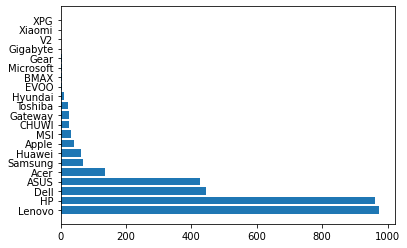

In [ ]:
plt.barh(tabla_marcas['marca'], tabla_marcas['cantidad'], align = 'center')

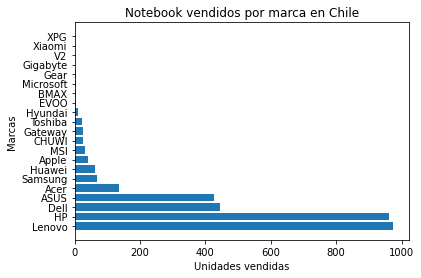

In [ ]:
fig, ax = plt.subplots()
ax.barh(tabla_marcas['marca'], tabla_marcas['cantidad'])
plt.title("Notebook vendidos por marca en Chile")
plt.ylabel('Marcas')
plt.xlabel('Unidades vendidas')
plt.show()

### Pregunta 2.4 (6 pts - bonus):

- Muestre en una tabla los precios normales promedios de todas las marcas (redondeé a dos decimales) y luego las estadísticas descriptivas (desviación estándar, promedio, valor máximo y mínimo) de las 3 marcas de Notebooks que tengan el mayor precio normal promedio y las 2 marcas que tengan el menor precio normal promedio (considere todos los Notebooks).

    *Ejemplo (primera tabla).*

| Marca | Precio normal promedio |
|:----------------:|:----------------:|
|  Marca 1 | 4.100.000 |
| ... | ... |
| Marca 26 | 250.000 |

- Entregue una tabla con los 30 Notebooks con mayor descuento (precio normal - precio oferta). La tabla debe contener los descuentos de mayor a menor y sin repetición de un mismo notebook en diferentes tiendas (mantenga el Notebook de una misma tienda con el descuento mayor).

    *Ejemplo.*

| Tienda | Nombre | Precio normal | Precio oferta | Descuento |
|:----------------:|:----------------:|:----------------:|:----------------:|:----------------:|
| Tienda x |  Nombre 1 | 900.000 |  830.000 | 70.000 |
| ... | ... | ... | ... | ... |
| Tienda x | Nombre 30 | 643.000 | 603.000 | 40.000 |



In [11]:
# Muestre en una tabla los precios normales promedios de todas las marcas
tabla_normal = df_clean[['marca', 'precio normal']]

In [12]:
# marcas
avr_normal = tabla_normal.groupby(['marca']).mean().reset_index().round(2).rename(columns={'precio normal':'precio normal promedio'})

In [13]:
# Seleccion de las marcas con mayor y menor precio promedio
marcas_mayorP = avr_normal.sort_values(by='precio normal promedio', ascending = False)[:3]
marcas_menorP = avr_normal.sort_values(by='precio normal promedio', ascending = False)[-2:]


In [14]:
# Estadística descriptiva de las 5 marcas seleccionadas
descripcion_marcas = pd.concat([marcas_mayorP, marcas_menorP])
print(descripcion_marcas.describe())

       precio normal promedio
count                 5.00000
mean             666465.10000
std              382599.45607
min              223558.33000
25%              273990.00000
50%              919842.00000
75%              927790.00000
max              987145.17000


In [29]:
#tienda, nombre, precio normal, precio oferta, descuento
descuentos = df_clean[['id', 'Tienda', 'name', 'precio normal', 'precio oferta']]
descuentos['descuento total'] = df_clean['precio normal']-df_clean['precio oferta']

In [33]:
descuentos = descuentos.sort_values(by='descuento total', ascending = False)[:30]

In [35]:
print(descuentos)

          id      Tienda                                               name  \
3268  112808  PC Factory  Huawei Matebook X Pro 2021 [MachD-WFE9A / 5301...   
3073  128273  PC Factory                       HP Omen 16-B0509LA [4P618LA]   
3083  135008  PC Factory  Samsung Galaxy Book2 Pro - Silver [NP950XED-KB...   
3153  110264  PC Factory          Huawei Matebook X [Euler-W19D / 53011SWS]   
3071  128273  PC Factory                       HP Omen 16-B0509LA [4P618LA]   
2946  136126  PC Factory  Samsung Galaxy Book2 360 - Silver [NP730QED-KB...   
3211  101280  PC Factory  Apple MacBook Air (Late 2020 / Apple Silicon M...   
3206  103257  PC Factory  Apple MacBook Air (Late 2020 / Apple Silicon M...   
3277  155117  PC Factory                        Dell G5 Gaming 5525 [5CFYD]   
3276  136123  PC Factory  ASUS Vivobook Pro 15 OLED K3500PC-L1386W [90NB...   
3163  133422  PC Factory                       Dell G15 Gaming 5511 [JPMK1]   
3165  125096  PC Factory           MSI Bravo 15 B5DD

## 3. Clasificación (23 ptos)

Para resolver el segundo problema (encontrar una relación entre las funciones de un Notebook
y su precio de venta), en primera instancia, se le ocurre formular un problema de clasificación en
vez de ir directo a uno de regresión. Es decir, se le ocurre formular un modelo que permita clasificar
un celular entre ciertos rangos de precios de acuerdo con las características que este tiene. Los
rangos de precios que usted debe generar para predecir (etiquetas) son los siguientes:

| Etiqueta | Precio | Rango |
|:----------------:|:----------------:|:----------------:|
| 0 | Bajo | [0 – 500.000) |
| 1 | Medio | [500.000 – 700.000) |
| 2 | Alto | [700.000 – más) |


**Consideraciones:**
- En esta tarea no tiene que predecir el precio real, sino más bien, debe
clasificar en qué rango de precios estará un celular de acuerdo con sus características.
- Revise que las variables de una misma columna estén en la misma unidad de medida.
- Para la clasificación usted puede utilizar las carcterísticas que estime conveniente, el único requisito es justificar sus decisiones. 
- Siguiendo la misma lógica del punto anterior, puede eliminar filas si aclara y menciona su eliminación.


### Preparación datos

Si dentro de esta etapa toma ciertas decisiones sobre el conjunto de datos, dejelas por escrita.

#### 1.1 Preprocese los datos para entrenar un algoritmo de Machine Learning. (3 pts)

Debe crear las etiquetas mencionadas en el enunciado, para esto se recomienda el uso de filtros para la creación de las etiquetas.

In [36]:
df_modelo = df_clean.reset_index().drop(columns=['index'])

In [40]:
df_modelo_precios = df_modelo.groupby('id').mean().reset_index()
df_modelo_precios['etiqueta'] = ''

In [41]:
#función para asignar etiquetas (modelo de Yesenia Lara)

def etiqueta(df, columna, nueva_columna):
  for i in range(df.shape[0]):
    
    if 0 <= df[columna][i] < 500000:
      df[nueva_columna][i] = 1

    elif 500000 <= df[columna][i] < 700000:
      df[nueva_columna][i] = 2
    
    else:
      df[nueva_columna][i] = 3

In [43]:
etiqueta(df_modelo_precios, 'precio normal', 'etiqueta')

In [44]:
#pasamos nan a 0
df_modelo_precios['freq_procesador_turbo_MHz'] = df_modelo_precios['freq_procesador_turbo_MHz'].replace(np.nan, 0)
df_modelo_precios['gb_gpu_dedicada'] = df_modelo_precios['gb_gpu_dedicada'].replace(np.nan, 0)

In [46]:
df_modelo_precios = df_modelo_precios.astype(int)
print(df_modelo_precios.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   id                         1079 non-null   int64
 1   precio oferta              1079 non-null   int64
 2   precio normal              1079 non-null   int64
 3   nucleos_procesador         1079 non-null   int64
 4   hilos_procesador           1079 non-null   int64
 5   freq_procesador_MHz        1079 non-null   int64
 6   freq_procesador_turbo_MHz  1079 non-null   int64
 7   GB_ram                     1079 non-null   int64
 8   freq_ram_MHz               1079 non-null   int64
 9   tamaño_almacenamiento      1079 non-null   int64
 10  gb_gpu_dedicada            1079 non-null   int64
 11  etiqueta                   1079 non-null   int64
dtypes: int64(12)
memory usage: 101.3 KB
None


In [47]:
df_modelo_precios = df_modelo_precios.drop(columns= (['precio normal', 'precio oferta']))

In [49]:
df_modelo_precios.corr()

,id,nucleos_procesador,hilos_procesador,freq_procesador_MHz,freq_procesador_turbo_MHz,GB_ram,freq_ram_MHz,tamaño_almacenamiento,gb_gpu_dedicada,etiqueta
id,1.000000,0.169755,0.189380,0.128814,0.190864,0.281450,0.221415,0.281183,0.002653,0.115038
nucleos_procesador,0.169755,1.000000,0.881576,-0.019780,0.386830,0.358597,0.476090,0.381010,0.256719,0.591815
hilos_procesador,0.189380,0.881576,1.000000,0.113835,0.525354,0.450730,0.510211,0.406368,0.333284,0.649770
freq_procesador_MHz,0.128814,-0.019780,0.113835,1.000000,0.230685,0.233158,0.079003,0.172547,0.271358,0.236384
freq_procesador_turbo_MHz,0.190864,0.386830,0.525354,0.230685,1.000000,0.359908,0.544511,0.302506,0.214044,0.471438
GB_ram,0.281450,0.358597,0.450730,0.233158,0.359908,1.000000,0.221557,0.373132,0.169816,0.440765
freq_ram_MHz,0.221415,0.476090,0.510211,0.079003,0.544511,0.221557,1.000000,0.256973,0.142060,0.403105
tamaño_almacenamiento,0.281183,0.381010,0.406368,0.172547,0.302506,0.373132,0.256973,1.000000,0.121516,0.381370
gb_gpu_dedicada,0.002653,0.256719,0.333284,0.271358,0.214044,0.169816,0.142060,0.121516,1.000000,0.351502
etiqueta,0.115038,0.591815,0.649770,0.236384,0.471438,0.440765,0.403105,0.381370,0.351502,1.000000


In [52]:
df_modelo_precios.shape
df_modelo_precios['etiqueta'].value_counts()

1    485
2    300
3    294
Name: etiqueta, dtype: int64

#### 1.2 Divida el conjunto de datos en entrenamiento, validación y test. (3 pts)

In [53]:
X, y = df_modelo_precios.drop(columns=['etiqueta']), df_modelo_precios['etiqueta']

In [54]:
X.shape, y.shape

((1079, 9), (1079,))

# Librerías Modelo

In [56]:
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=2)

In [58]:
X_train.shape, y_train.shape


((604, 9), (604,))

In [59]:
X_test.shape, y_test.shape

((324, 9), (324,))

In [60]:
X_val.shape, y_val.shape

((151, 9), (151,))

In [61]:
#Estandarización de datos
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
X_val_sc = sc.transform(X_val)

In [62]:
y_train.value_counts()

1    286
2    159
3    159
Name: etiqueta, dtype: int64

In [63]:
# Aplicamos SMOTE para nivelar el tamaño de las muestras
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X_train_sm, y_train_sm = oversample.fit_resample(X_train_sc, y_train)

In [65]:
X_train_sm.shape, y_train_sm.shape

((858, 9), (858,))

In [66]:
y_train_sm.value_counts()

2    286
1    286
3    286
Name: etiqueta, dtype: int64

### Modelamiento

Se espera que entrene el modelo con los datos de entrenamiento y busqué los mejores hiperparametros sobre el conjunto de validación. Recuerde utilizar las métricas vistas en clases.

#### 1.3 Entrene el algoritmo sobre el conjunto de entrenamiento. (5 pts)

In [67]:
# SVC
SVC_params = {'C':[0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100 , 1000], 
            'gamma': [0.0000001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10],
             'class_weight':['balanced']}


In [71]:
%%time
SVC_Model = GridSearchCV(SVC(random_state=123, gamma= 'scale', kernel= 'rbf'), SVC_params, cv=5, n_jobs=-1) 

CPU times: user 71 µs, sys: 9 µs, total: 80 µs
Wall time: 83.2 µs


In [ ]:
# Arbol de Decisión
RandomForest_params= {'n_estimators':[50, 100, 500, 1000, 2000], 
                         'criterion':['gini'],
                         'class_weight':['balanced']}

In [70]:
%%time
dt = DecisionTreeClassifier(max_depth= 1 , random_state= 11238)
dt_model = dt.fit(X_train_sm, y_train_sm)

CPU times: user 3.21 ms, sys: 0 ns, total: 3.21 ms
Wall time: 8.36 ms


In [72]:
print(f"- Mejor combinación de hiper parámetros SVC: \n\t{svc.best_params_}\n")
print(f"- Desempeño del modelo final SVC: \n\t{svc.best_score_}")
bestimatorSVC_modelo_final = svc.best_estimator_

NameError: ignored

#### 1.4 Valide sus resultados. (5 pts)

### Modelo en producción (7 pts)

Luego de asegurarse de que encontró los mejores hiperparametros para el modelo, debe ponerlo en producción. Para esto se utilizaran los datos de test (es muy importante que estos datos no hayan sido utilizados antes), ya que esto permite evaluar el desempeño de su modelo sobre datos que no se tienen disponibles en la práctica.

#### 1.5 Pruebe el algoritmo sobre datos con los que no ha trabajado antes (datos de test). (2 pts)

#### 1.6 Concluya los resultados obtenidos, tanto para el conjunto de validación, como para el conjunto de test. (5 pts)